In [7]:
import pandas as pd
from google.colab import files
up=files.upload()

Saving mm.csv to mm.csv


In [8]:
import pandas as pd
X=pd.read_csv("mm.csv" )
X.head()#displays first 5 rows of data
X.tail()#displays last 5 rows of data
X.shape
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5333 entries, 0 to 5332
Data columns (total 20 columns):
Web ID                                 5333 non-null int64
Region of Incident                     5333 non-null object
Reported Date                          5333 non-null object
Reported Year                          5333 non-null int64
Reported Month                         5333 non-null object
Number Dead                            5142 non-null float64
Minimum Estimated Number of Missing    503 non-null float64
Total Dead and Missing                 5333 non-null int64
Number of Survivors                    749 non-null float64
Number of Females                      897 non-null float64
Number of Males                        2813 non-null float64
Number of Children                     644 non-null float64
Cause of Death                         5333 non-null object
Location Description                   5323 non-null object
Information Source                     5331 non-null o

In [9]:
X.isnull()

,Web ID,Region of Incident,Reported Date,Reported Year,Reported Month,Number Dead,Minimum Estimated Number of Missing,Total Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Cause of Death,Location Description,Information Source,Location Coordinates,Migration Route,URL,UNSD Geographical Grouping,Source Quality
0,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,True,True,True,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,True,True,True,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,True,True,False,True,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5328,False,False,False,False,False,False,True,False,True,True,False,True,False,False,False,False,False,False,False,False
5329,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False
5330,False,False,False,False,False,False,True,False,True,True,True,True,False,False,False,False,False,True,False,False
5331,False,False,False,False,False,False,True,False,True,True,True,True,False,False,False,False,False,True,False,False


In [10]:
#count number of nulls in each column:
X.isnull().sum()

Web ID                                    0
Region of Incident                        0
Reported Date                             0
Reported Year                             0
Reported Month                            0
Number Dead                             191
Minimum Estimated Number of Missing    4830
Total Dead and Missing                    0
Number of Survivors                    4584
Number of Females                      4436
Number of Males                        2520
Number of Children                     4689
Cause of Death                            0
Location Description                     10
Information Source                        2
Location Coordinates                      1
Migration Route                        2673
URL                                    2141
UNSD Geographical Grouping               11
Source Quality                            0
dtype: int64

In [11]:
#we can drop all rows with a null using X.dropna() but this is not at all intelligence as a lot of data will be gone
#we can also delete columns with null using X.dropna(aXis=1)
#other way out is IMPUTAION-add mean median or mode at emplty places

ch1=X['Number Dead']#eXtract the column where changes have to be made
#we are chosing a Series
ch1.shape
#ch1 is a Seires, info() is not associated with series
ch1.head()

0    NaN
1    4.0
2    1.0
3    1.0
4    1.0
Name: Number Dead, dtype: float64

In [12]:
ch1_m=ch1.mean()#calculated mean of Number Dead
ch1_m

3.2876312718786465

In [0]:
#now fill this mean on places where there is no value in that column and make changes in original file using inplace
ch1_m=ch1.fillna('ch1_m',inplace=True)

In [14]:
X.isnull().sum()#number dead null=0 now

Web ID                                    0
Region of Incident                        0
Reported Date                             0
Reported Year                             0
Reported Month                            0
Number Dead                               0
Minimum Estimated Number of Missing    4830
Total Dead and Missing                    0
Number of Survivors                    4584
Number of Females                      4436
Number of Males                        2520
Number of Children                     4689
Cause of Death                            0
Location Description                     10
Information Source                        2
Location Coordinates                      1
Migration Route                        2673
URL                                    2141
UNSD Geographical Grouping               11
Source Quality                            0
dtype: int64

In [15]:
X['Migration Route'].describe()

count                      2660
unique                       15
top       Central America to US
freq                       1507
Name: Migration Route, dtype: object

In [16]:
X['Migration Route'].value_counts().describe()

count      15.000000
mean      177.333333
std       394.023325
min         1.000000
25%         2.500000
50%        15.000000
75%       147.000000
max      1507.000000
Name: Migration Route, dtype: float64

In [17]:
X.corr()

,Web ID,Reported Year,Minimum Estimated Number of Missing,Total Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Source Quality
Web ID,1.000000,0.480901,-0.087764,-0.076814,-0.049978,-0.186596,-0.052451,-0.091599,-0.112948
Reported Year,0.480901,1.000000,-0.099610,-0.109814,-0.109843,-0.065971,-0.041986,-0.123426,0.034455
Minimum Estimated Number of Missing,-0.087764,-0.099610,1.000000,0.890633,0.164957,0.263703,0.617315,0.705133,0.115352
Total Dead and Missing,-0.076814,-0.109814,0.890633,1.000000,0.042710,0.413470,0.614926,0.672898,0.057964
Number of Survivors,-0.049978,-0.109843,0.164957,0.042710,1.000000,-0.005382,0.071539,-0.029135,0.026374
Number of Females,-0.186596,-0.065971,0.263703,0.413470,-0.005382,1.000000,0.625940,0.435980,0.207506
Number of Males,-0.052451,-0.041986,0.617315,0.614926,0.071539,0.625940,1.000000,0.188623,0.048507
Number of Children,-0.091599,-0.123426,0.705133,0.672898,-0.029135,0.435980,0.188623,1.000000,0.092286
Source Quality,-0.112948,0.034455,0.115352,0.057964,0.026374,0.207506,0.048507,0.092286,1.000000


In [18]:
'''Positive numbers indicate a positive correlation — one goes up the other goes up — 
and negative numbers represent an inverse correlation — one goes up the other goes down.
 1.0 indicates a perfect correlation'''

'Positive numbers indicate a positive correlation — one goes up the other goes up — \nand negative numbers represent an inverse correlation — one goes up the other goes down.\n 1.0 indicates a perfect correlation'

In [19]:
#we saw that number dead is a series and not a data frame but it can be treated ad a data frame by using double brackets
type(X[['Number Dead']])

pandas.core.frame.DataFrame

In [20]:
#now we can add one more column to it
sub=X[['Number Dead','Number of Children']]
sub.head()

,Number Dead,Number of Children
0,ch1_m,NaN
1,4,1.0
2,1,NaN
3,1,NaN
4,1,NaN


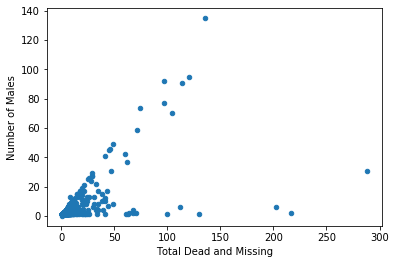

In [21]:
import matplotlib.pyplot as plt
X.head()
X.plot(x='Total Dead and Missing',y='Number of Males',kind='scatter')

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


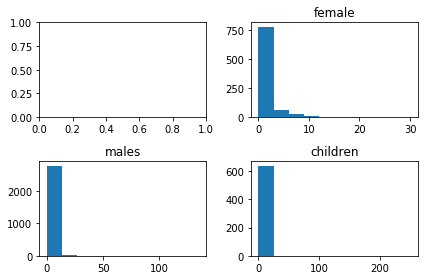

In [42]:

import numpy as np
fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flatten()
n_bins=10
ax3.hist(X['Number of Children'], n_bins, histtype='bar')
ax3.set_title('children')
ax2.hist(X['Number of Males'], n_bins, histtype='bar')
ax2.set_title('males')
ax1.hist(X['Number of Females'], n_bins, histtype='bar')
ax1.set_title('female')
fig.tight_layout()
plt.show()

In [0]:
names=('Number of Children')
values =('Total Dead and Missing')



In [0]:
import seaborn as sns


Text(0.5, 1.0, 'missing number')

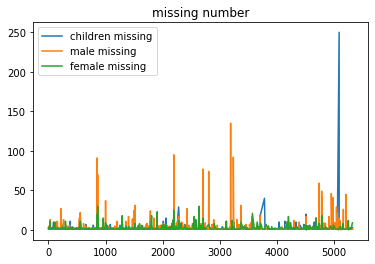

In [61]:
sns.lineplot(data=X['Number of Children'],label='children missing')
sns.lineplot(data=X['Number of Males'],label='male missing')
sns.lineplot(data=X['Number of Females'],label='female missing')

plt.title("missing number")

<Figure size 2880x4320 with 0 Axes>

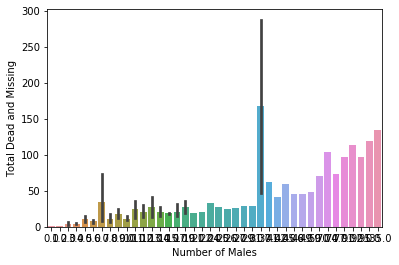

<Figure size 2880x4320 with 0 Axes>

In [67]:
sns.barplot(x=X['Number of Males'], y=X['Total Dead and Missing'])
plt.figure(figsize=(40,60))



In [77]:
X.info()
X.isnull()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5333 entries, 0 to 5332
Data columns (total 20 columns):
Web ID                                 5333 non-null int64
Region of Incident                     5333 non-null object
Reported Date                          5333 non-null object
Reported Year                          5333 non-null int64
Reported Month                         5333 non-null object
Number Dead                            5333 non-null object
Minimum Estimated Number of Missing    503 non-null float64
Total Dead and Missing                 5333 non-null int64
Number of Survivors                    749 non-null float64
Number of Females                      897 non-null float64
Number of Males                        2813 non-null float64
Number of Children                     644 non-null float64
Cause of Death                         5333 non-null object
Location Description                   5323 non-null object
Information Source                     5331 non-null ob

,Web ID,Region of Incident,Reported Date,Reported Year,Reported Month,Number Dead,Minimum Estimated Number of Missing,Total Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Cause of Death,Location Description,Information Source,Location Coordinates,Migration Route,URL,UNSD Geographical Grouping,Source Quality
0,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,True,True,True,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,True,True,True,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,True,True,False,True,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5328,False,False,False,False,False,False,True,False,True,True,False,True,False,False,False,False,False,False,False,False
5329,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False
5330,False,False,False,False,False,False,True,False,True,True,True,True,False,False,False,False,False,True,False,False
5331,False,False,False,False,False,False,True,False,True,True,True,True,False,False,False,False,False,True,False,False


In [81]:
X.isnull().sum()

Web ID                                    0
Region of Incident                        0
Reported Date                             0
Reported Year                             0
Reported Month                            0
Number Dead                               0
Minimum Estimated Number of Missing    4830
Total Dead and Missing                    0
Number of Survivors                    4584
Number of Females                      4436
Number of Males                        2520
Number of Children                     4689
Cause of Death                            0
Location Description                     10
Information Source                        2
Location Coordinates                      1
Migration Route                        2673
URL                                    2141
UNSD Geographical Grouping               11
Source Quality                            0
dtype: int64

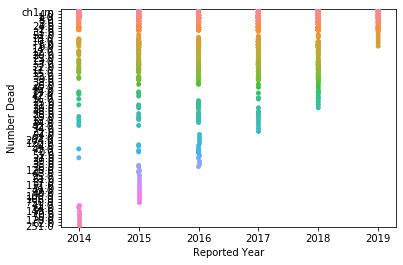

In [89]:
sns.swarmplot(x=X['Reported Year'], y=X['Number Dead'])



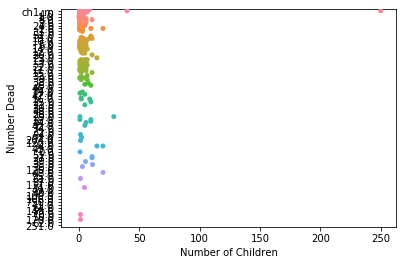

In [105]:

sns.swarmplot(x=X['Number of Children'], y=X['Number Dead'])

